In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')  # or 'train.csv' depending on filename

# First look at the data
print("First 5 rows:")
print(df.head())

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [2]:
print("Last 5 rows:")
print(df.tail(5))

Last 5 rows:
     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [3]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [6]:
missing_numbers = df.isnull().sum()

print(missing_numbers)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
grouped_by_age = df.groupby("Age")[["Survived"]].mean()
print(grouped_by_age)

       Survived
Age            
0.42        1.0
0.67        1.0
0.75        1.0
0.83        1.0
0.92        1.0
...         ...
70.00       0.0
70.50       0.0
71.00       0.0
74.00       0.0
80.00       1.0

[88 rows x 1 columns]


In [8]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
# Create age bins (e.g., 0–4, 5–9, ..., up to max age)
bins = range(0, int(df["Age"].max()) + 5, 5)  # Automatically adapts to your data
labels = [f"{i}-{i+4}" for i in bins[:-1]]    # Optional: for prettier bin labels

# Create a new binned column
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Group by age bins and count Survived or Name
grouped_by_age = df.groupby("AgeGroup")[["Survived"]].mean()
# Group by AgeGroup and Survived, then count entries
age_survival_counts = df.groupby(["AgeGroup", "Survived"]).size().unstack(fill_value=0)

print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeGroup  
0      0         A/5 21171   7.2500   NaN        S    20-24  
1      0          PC 17599  71.2833   C85        C    35-39  
2      0  STON/O2. 3101282   7.9250   NaN        S    25-29  
3      0            113803  53.1000  C123        S    35-39  
4      0  

/tmp/ipykernel_42338/570640938.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_age = df.groupby("AgeGroup")[["Survived"]].mean()
/tmp/ipykernel_42338/570640938.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = df.groupby(["AgeGroup", "Survived"]).size().unstack(fill_value=0)


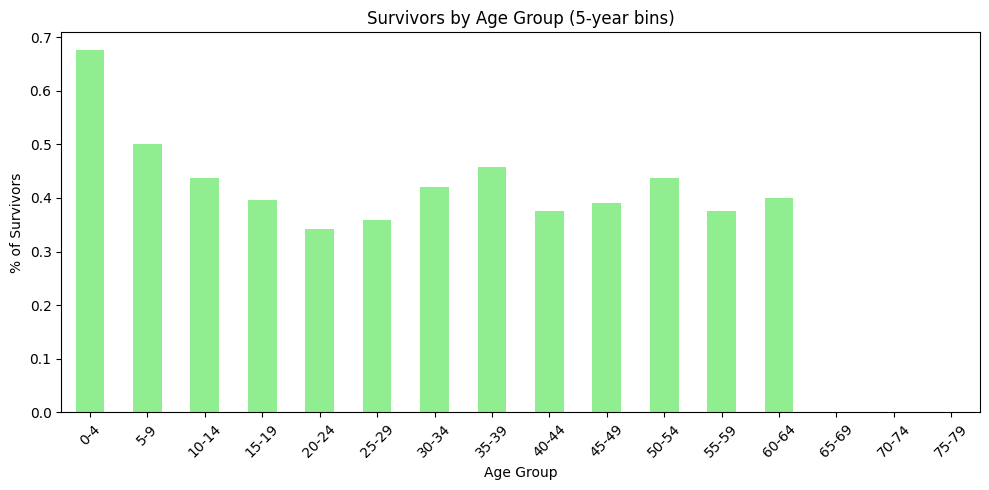

In [10]:
grouped_by_age["Survived"].plot(kind="bar", figsize=(10,5), color="lightgreen")
plt.title("Survivors by Age Group (5-year bins)")
plt.xlabel("Age Group")
plt.ylabel("% of Survivors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


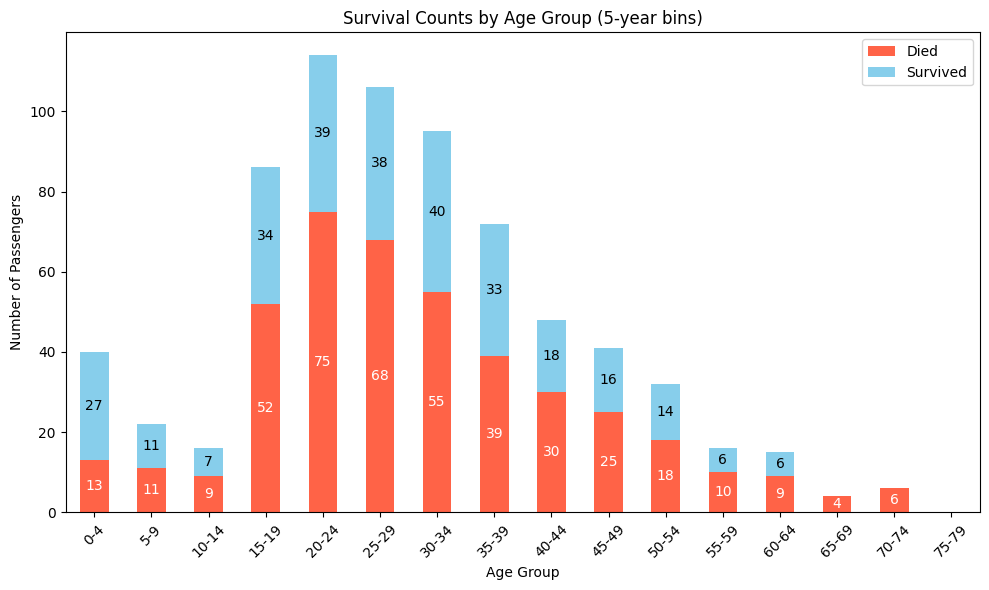

In [11]:
# Create the plot
ax = age_survival_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["tomato", "skyblue"]
)

plt.title("Survival Counts by Age Group (5-year bins)")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(["Died", "Survived"])
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to each bar segment
for idx, (died, survived) in enumerate(zip(age_survival_counts[0], age_survival_counts[1])):
    if died > 0:
        ax.text(idx, died / 2, str(died), ha='center', va='center', color='white')
    if survived > 0:
        ax.text(idx, died + survived / 2, str(survived), ha='center', va='center', color='black')

plt.show()

In [12]:
print(df[["Survived"]].mean())

Survived    0.383838
dtype: float64


In [13]:
def classifyAge(age):
    if (age < 13):
        return "Child"
    elif (age < 18):
        return "Teen"
    elif (age < 66):
        return "Adult"
    elif (age > 80): 
        return "Senior"
    else: return "Unknown"

In [14]:
df["AgeGroup"] = df["Age"].apply(classifyAge)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [16]:
df["Fare"].apply("{:.2f}".format).head()

0     7.25
1    71.28
2     7.92
3    53.10
4     8.05
Name: Fare, dtype: object

In [17]:
def extractTitle(name):
    if pd.isna(name):
        return None
    parts = name.split(',')
    if len(parts) > 1:
        after_comma = parts[1].strip()
        title = after_comma.split(' ')[0]
        return title
    return None


In [18]:
extractTitle("Smith, Mr. John")


'Mr.'

In [19]:
df["Title"] = df["Name"].apply(extractTitle)

In [20]:
df.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Adult,Mrs.
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Adult,Mr.
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,Adult,Mr.
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Adult,Mrs.
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Teen,Miss.
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,Adult,Mr.
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Adult,Mr.
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Unknown,Mr.
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Adult,Mrs.
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Adult,Mrs.


In [21]:
most_common_embark = df["Embarked"].value_counts().idxmax()
print(most_common_embark)

S


In [22]:
df["Embarked"] = df["Embarked"].fillna(most_common_embark)

In [23]:
df["Embarked"].isna().sum()

np.int64(0)

In [24]:
by_sex = df.groupby("Sex")["Survived"].mean()

by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [25]:
by_Pclass = df.groupby("Pclass")["Survived"].mean()

by_Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [26]:
by_port = df.groupby("Embarked")["Survived"].mean()

by_port

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

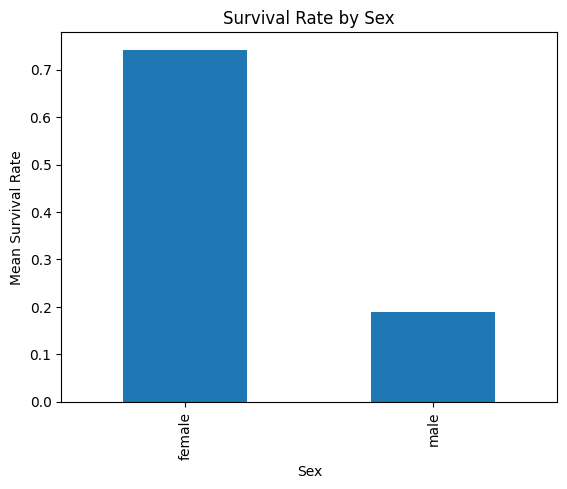

In [27]:

by_sex.plot(kind='bar')
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Sex")
plt.show()


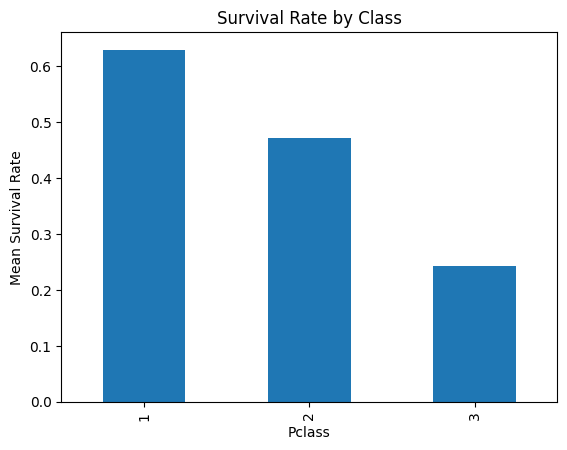

In [28]:

by_Pclass.plot(kind='bar')
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Class")
plt.show()


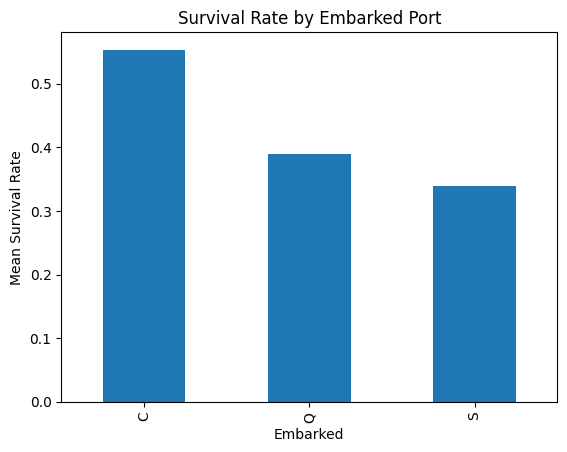

In [29]:

by_port.plot(kind='bar')
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Embarked Port")
plt.show()


In [30]:
by_Age = df.groupby("AgeGroup")["Survived"].mean()

by_Age

AgeGroup
Adult      0.384486
Child      0.579710
Teen       0.477273
Unknown    0.286486
Name: Survived, dtype: float64

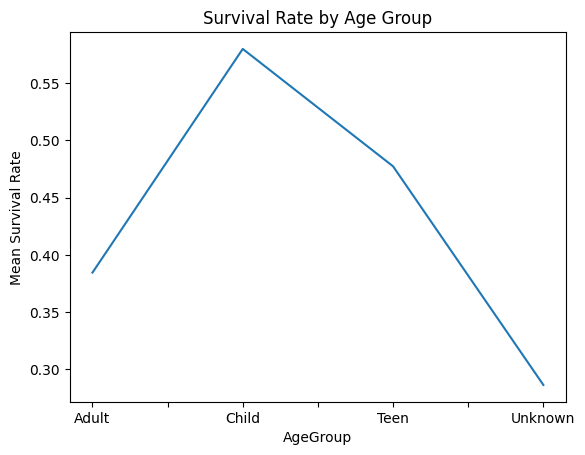

In [31]:

by_Age.plot(kind='line')
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Age Group")
plt.show()


In [32]:
def fare_bracket(fare):
    if fare < 0 or fare > 513:
        return "Invalid fare"
    if fare <= 128:
        return "Economy"
    elif fare <= 256:
        return "Standard"
    elif fare <= 384:
        return "Premium"
    elif fare <= 513:
        return "Luxury"
    else: return "Unknown"


In [33]:
df["FareBrakets"] = df["Fare"].apply(fare_bracket)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FareBrakets
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr.,Economy
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs.,Economy
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Miss.,Economy
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs.,Economy
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr.,Economy


In [34]:
by_fare_braket = df.groupby("FareBrakets")["Survived"].mean()

by_fare_braket

FareBrakets
Economy     0.368113
Luxury      1.000000
Premium     0.666667
Standard    0.724138
Name: Survived, dtype: float64

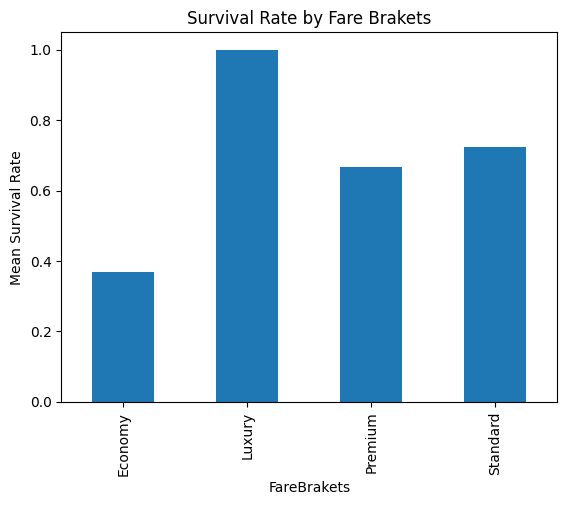

In [35]:
by_fare_braket.plot(kind='bar')
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Fare Brakets")
plt.show()


In [36]:
fare_count = df.groupby("FareBrakets").count()
fare_count

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
FareBrakets,,,,,,,,,,,,,,
Economy,853,853,853,853,853,680,853,853,853,853,174,853,853,853
Luxury,3,3,3,3,3,3,3,3,3,3,2,3,3,3
Premium,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Standard,29,29,29,29,29,25,29,29,29,29,22,29,29,29


In [37]:

df["HasCabin"] = ~df["Cabin"].isna() 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FareBrakets,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr.,Economy,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs.,Economy,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Miss.,Economy,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs.,Economy,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr.,Economy,False


In [38]:
by_cabin = df.groupby("HasCabin")["Survived"].mean()

by_cabin

HasCabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64

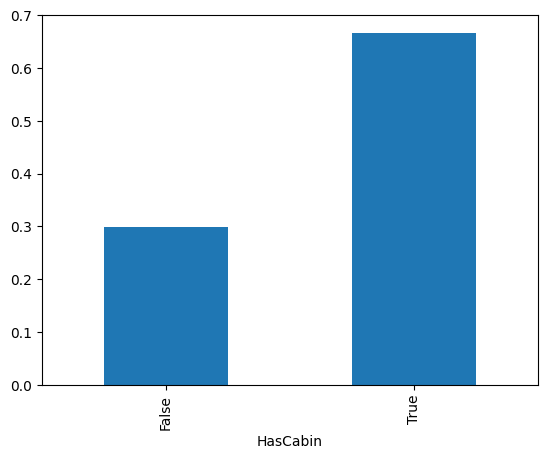

In [39]:
by_cabin.plot(kind='bar')

plt.show()

In [40]:
has_cabin = df.groupby("HasCabin")["Survived"].count()

has_cabin

HasCabin
False    687
True     204
Name: Survived, dtype: int64

In [41]:
survivors_by_cabin = df[df["Survived"] == 1].groupby("HasCabin")["Survived"].count()
print(survivors_by_cabin)
nonsurvivors_by_cabin = df[df["Survived"] == 0].groupby("HasCabin")["Survived"].count()
print(nonsurvivors_by_cabin)


HasCabin
False    206
True     136
Name: Survived, dtype: int64
HasCabin
False    481
True      68
Name: Survived, dtype: int64


In [42]:
def getDeck(cabin):
    if pd.notna(cabin):
        return cabin[0]
    else:
        return None


In [43]:
df["Deck"] = df["Cabin"].apply(getDeck)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FareBrakets,HasCabin,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr.,Economy,False,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs.,Economy,True,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Miss.,Economy,False,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs.,Economy,True,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr.,Economy,False,None


In [44]:
deck_to_class = df.groupby("Deck")["Pclass"].describe()
deck_to_class

,count,mean,std,min,25%,50%,75%,max
Deck,,,,,,,,
A,15.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
B,47.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
C,59.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
D,33.0,1.121212,0.331434,1.0,1.0,1.0,1.0,2.0
E,32.0,1.312500,0.644455,1.0,1.0,1.0,1.0,3.0
F,13.0,2.384615,0.506370,2.0,2.0,2.0,3.0,3.0
G,4.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
T,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [47]:
deck_to_survival = df.groupby("Deck")["Survived"].mean()
deck_to_survival

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

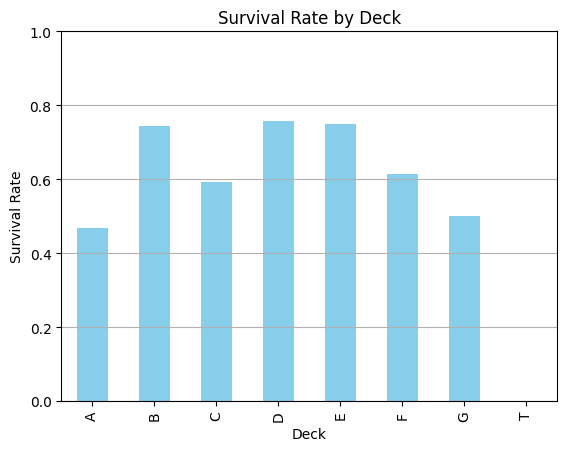

In [48]:
deck_to_survival.plot(kind="bar", title="Survival Rate by Deck", color="skyblue")
plt.ylabel("Survival Rate")
plt.xlabel("Deck")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


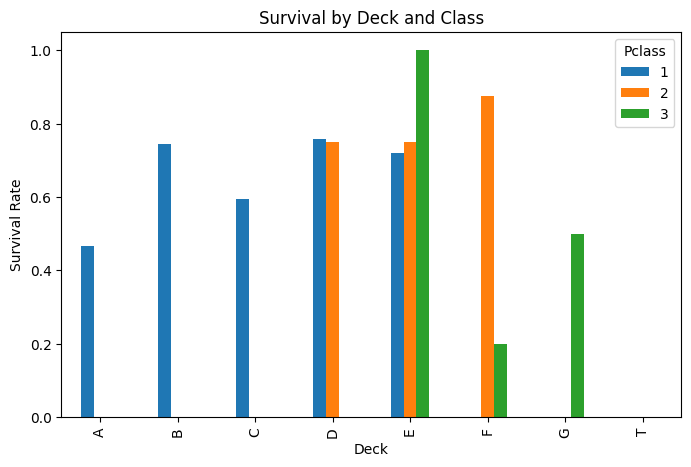

In [49]:
# Survival rate by Deck *and* Pclass
deck_class_survival = df.groupby(["Deck", "Pclass"])["Survived"].mean().unstack()
deck_class_survival.plot(kind="bar", figsize=(8,5))
plt.ylabel("Survival Rate")
plt.title("Survival by Deck and Class")
plt.show()


In [50]:
df.groupby(["Deck", "Pclass"])["Survived"].count()


Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
Name: Survived, dtype: int64

In [51]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
AgeGroup       0.000000
Title          0.000000
FareBrakets    0.000000
HasCabin       0.000000
Deck           0.771044
dtype: float64

In [52]:
median_age = df["Age"].median()
median_age

np.float64(28.0)

In [53]:
df["Age"] = df["Age"].fillna(median_age)


In [54]:
df["Age"].isna().sum()

np.int64(0)

In [55]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FareBrakets,HasCabin,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr.,Economy,False,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs.,Economy,True,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Miss.,Economy,False,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs.,Economy,True,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr.,Economy,False,None
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Unknown,Mr.,Economy,False,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,Mr.,Economy,True,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,Master.,Economy,False,None
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,Mrs.,Economy,False,None
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teen,Mrs.,Economy,False,None


### Feature Selection: Based on my analysis, these are the top 5 features I think would be most predictive of survival.
1. sex
2. class
3. if has cabin information
4. age
5. family